# Spotify CSV Preprocessing
By Niki Vasan

### Import Data

In [18]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import random

In [19]:
path = '~/Desktop/CS470FinalProject/data_preprocessing/original_datasets/genres_v2.csv'
music = pd.read_csv(path, low_memory=False)
music.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


### Clean Data

First, I check if any of the attributes have missing values, as this is a pre-scraped csv from the Spotify Web API. I find that song_name has roughly ~20k missing values.

In [20]:
# song name has missing values which is problematic
music.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

Some missing song names appear to have `title` values, and others have `Unnamed: 0` values. Thus, I will combine these attributes into one `song_name` attribute.

In [21]:
music[music.song_name.isna()]['Unnamed: 0'].isna().sum()

6

In [40]:
music_df = music
music_df['song_name'] = music_df['song_name'].fillna(music_df['title'])
music_df['song_name'] = music_df['song_name'].fillna(music_df['Unnamed: 0'])
music_df = music_df.drop(columns=['title', 'Unnamed: 0', 'track_href', 'analysis_url', 'uri', 'type', 'id'])
music.isna().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name               6
Unnamed: 0          21525
title               21525
dtype: int64

In [41]:
# there are still 6 rows that don't have any kind of song name, drop them
music_df = music_df.dropna()
music_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre,song_name
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4,Dark Trap,Mercury: Retrograde
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4,Dark Trap,Pathology
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4,Dark Trap,Symbiote
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote)
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4,Dark Trap,Venom


After dropping all rows with a missing song name and removing the `title` and `Unnamed: 0` columns, along with other columns that are specific to the author's API calls, the resulting dataset has ~21.5k entries with 15 attributes.

Also, I create a table to keep track of song IDs and song names.

In [24]:
song_id = music[['id', 'song_name']]
song_id.head()

,id,song_name
0,2Vc6NJ9PW9gD9q343XFRKx,Mercury: Retrograde
1,7pgJBLVz5VmnL7uGHmRj6p,Pathology
2,0vSWgAlfpye0WCGeNmuNhy,Symbiote
3,0VSXnJqQkwuH2ei1nOQ1nu,ProductOfDrugs (Prod. The Virus and Antidote)
4,4jCeguq9rMTlbMmPHuO7S3,Venom


### Correlation Matrix

First, let's ensure there is no collinearity among the quantitative features.

In [42]:
music_df.drop(columns=['duration_ms', 'time_signature'], inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

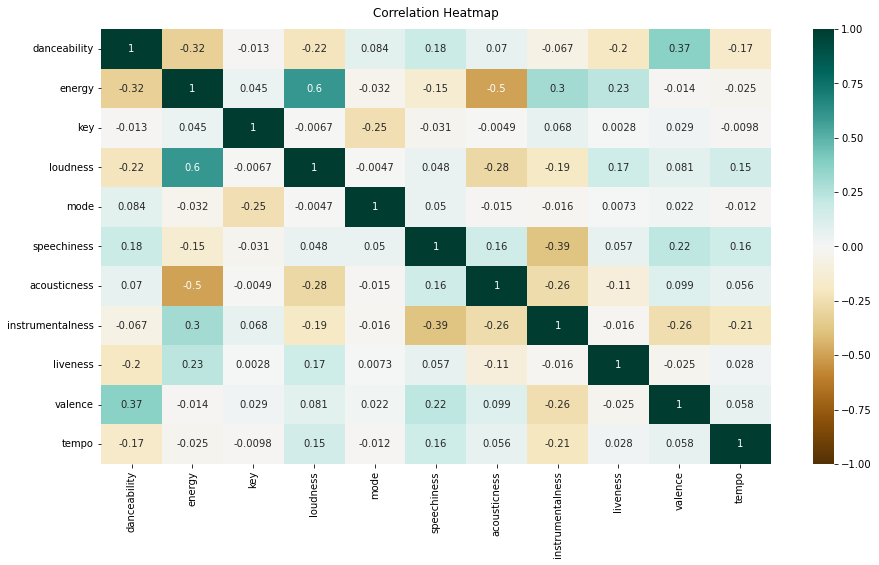

In [43]:
plt.figure(figsize=(15, 8))
heatmap = sns.heatmap(music_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
# plt.figure(figsize=(8, 12))
# heatmap = sns.heatmap(music_df.corr()[['genre']].sort_values(by='genre', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Genre', fontdict={'fontsize':18}, pad=16)

There seems to be an inverse relationship between acousticness and energy (corr = -0.5). There also appears to be a positive relationship between loudness and energy (corr = 0.6), as well as between duration and instrumentalness (corr = 0.6). 

Text(0, 0.5, 'energy')

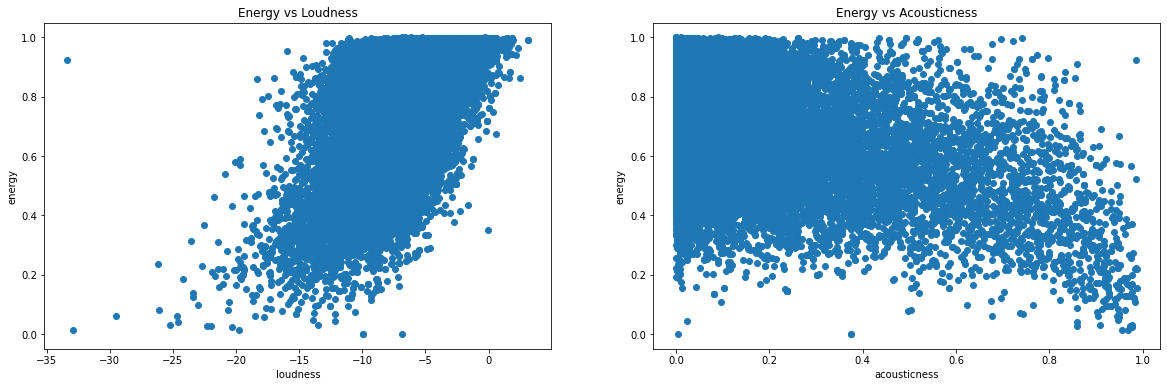

In [44]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

axes[0].scatter(music_df['loudness'], music_df['energy'])
axes[0].set_title('Energy vs Loudness')
axes[0].set_xlabel('loudness')
axes[0].set_ylabel('energy')

axes[1].scatter(music_df['acousticness'], music_df['energy'])
axes[1].set_title('Energy vs Acousticness')
axes[1].set_xlabel('acousticness')
axes[1].set_ylabel('energy')

By the above charts, it is clear that energy and loudness are positively correlated. For this reason, I will drop loudness as a feature.

In [27]:
music_df = music_df.drop(columns=['loudness'])

### Encoding

It's important to note that genre is not included in the above Pearson Correlation matrix because it is categorical. To fix this, I will encode the attribute to become integer-valued, with each genre mapping to a specified number.

In [28]:
# 14 genres
music_df['genre'].unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [29]:
# encode genre
encoder = OrdinalEncoder()
music_df[['genre']] = encoder.fit_transform(music_df[['genre']])

In [30]:
# save original encoding
# encoder_mapping = {'Dark Trap': 0.0, 'Emo':1.0, 'Hiphop':2.0, 'Pop':3.0, 'Rap':4.0, 'RnB':5.0, 'Trap Metal':6.0, 'Underground Rap':7.0}

### Feature Scaling

Next, I will normalize the quantitative attributes to prevent any issues with feature scaling. I will use z-score normalization from sklearn's Standard Scaler library.

In [53]:
music_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000,42299.000000
mean,0.639358,0.762544,5.369843,-6.464941,0.549446,0.136549,0.096161,0.283069,0.214091,0.357090,147.473466
std,0.156622,0.183813,3.666167,2.940971,0.497555,0.126158,0.170836,0.370796,0.175585,0.233195,23.843268
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000
25%,0.524000,0.632000,1.000000,-8.160000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005950,0.135000,0.322000,144.973000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.453000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000


In [32]:
song_names = music_df[['song_name']]
music_df = music_df.drop(columns=['song_name'])

In [33]:
music_df.columns

Index(['danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

In [34]:
scaler = StandardScaler()
music_scaled = scaler.fit_transform(music_df)
music_scaled = pd.DataFrame(music_scaled, columns=music_df.columns)
music_scaled

,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,genre
0,1.223614,0.279938,-0.919184,0.905548,2.246819,-0.212844,-0.727278,-0.902652,0.136840,0.398924,-1.227071,0.102119,-1.669173
1,0.508507,-1.466426,0.717422,0.905548,-0.452997,1.784414,-0.763417,-0.547265,-0.999562,-1.358616,-0.256892,0.102119,-1.669173
2,1.344927,0.709728,-0.100881,0.905548,-0.588543,-0.482111,-0.763406,0.899343,-1.363640,2.960054,-1.476861,0.102119,-1.669173
3,-1.043020,0.100405,-1.464720,0.905548,-0.265928,-0.424160,-0.763417,-0.570046,-0.780858,1.655604,-1.235598,-3.624835,-1.669173
4,1.012913,-0.753735,-0.919184,0.905548,1.240135,0.707347,-0.763417,-0.273890,1.003079,0.021580,-1.239124,0.102119,-1.669173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42294,-0.711006,-0.378349,-0.373649,0.905548,-0.841403,-0.378501,-0.762487,-0.530179,0.158282,0.106511,0.178051,0.102119,0.389803
42295,-0.781240,0.029680,-1.464720,-1.104304,-0.702687,-0.431184,-0.763368,-0.051773,0.111110,0.102946,-0.395929,0.102119,0.389803
42296,-1.777282,0.318020,0.717422,0.905548,-0.682077,-0.410696,-0.762764,0.973382,-0.999562,0.312945,-0.155919,0.102119,0.389803
42297,-1.036636,0.862059,0.171886,-1.104304,-0.771648,-0.559665,-0.683588,-0.891831,0.561383,0.107727,0.702458,0.102119,0.389803


### Export Data
Note, genre is categorical, integer-scaled but now is normalized using Standard Scaler.

In [35]:
music_scaled.to_csv('genre_processed_v1.csv')